In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
metro_data=pd.read_csv("metro.csv")

# Problem Statement

The problem in hand is to predict the volume of Metro traffic volume. Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.



#  Descriptive analysis and Exploratory data analysis

In [40]:
metro_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [41]:
metro_data.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [42]:
metro_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


F:\nff\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
F:\nff\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


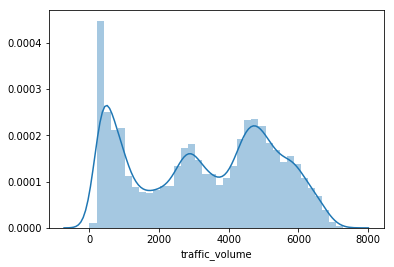

In [43]:
sns.distplot(metro_data.traffic_volume)

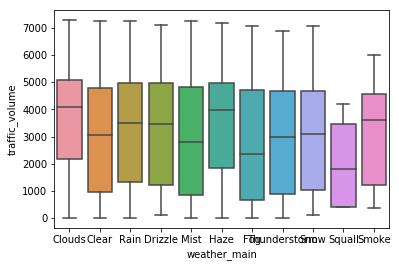

In [44]:
sns.boxplot(x="weather_main",y="traffic_volume",data=metro_data)

The above box plot shows the traffic volume against all kinds of weather. The average value of the traffic with cloudy and hazey weather is greatest and it is lowest for squally weather. The traffic , therefore, is highly dependent on the weather

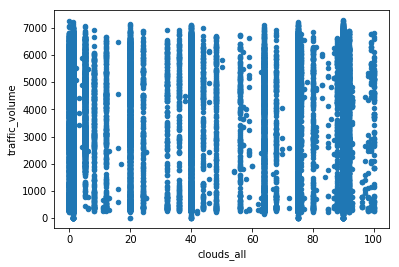

In [45]:
metro_data.plot.scatter(x="clouds_all",y="traffic_volume")

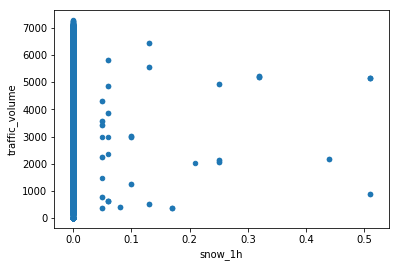

In [46]:
metro_data.plot.scatter(x="snow_1h",y="traffic_volume")

The above graph represents the relation of traffic flow in mm of snow that occurred in the hour. It shows no or very low correlation

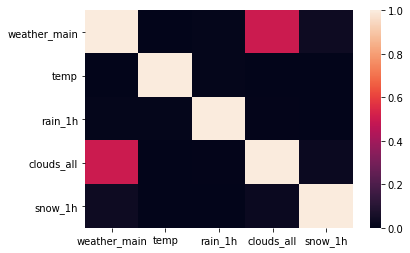

In [60]:
T = (metro_data.loc[:, ['weather_main','temp','rain_1h','clouds_all','snow_1h']]).corr()
sns.heatmap(T, vmin=0,vmax=1)

#  Preprocessing

In [61]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelEncoder_for_catagories=LabelEncoder() # For Lable Encoding

In [62]:
metro_data['weather_main']=labelEncoder_for_catagories.fit_transform(metro_data['weather_main'])

# Predictive modelling using LASSO Regression

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = metro_data.loc[:,['weather_main','temp','rain_1h','snow_1h']].values
y=metro_data.traffic_volume.values

In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [66]:
from sklearn.linear_model import LassoLarsCV
model=LassoLarsCV(cv=10, precompute=False).fit(X_train,y_train)

Text(0.5,1,'Regression Coefficients Progression for Lasso Paths')

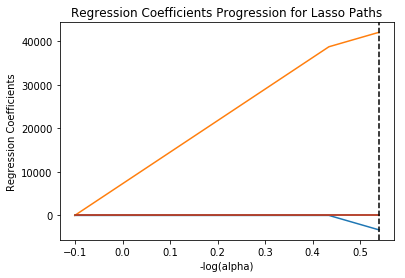

In [67]:
import matplotlib.pylab as plt
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')


F:\nff\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
F:\nff\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)
F:\nff\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5,1,'Mean squared error on each fold')

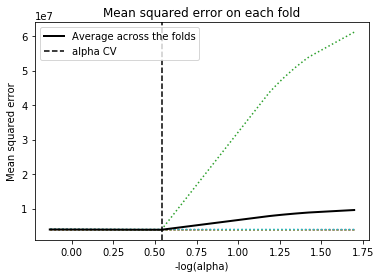

In [68]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [69]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
3878226.105451718
test data MSE
3912818.4616153967


In [70]:
import statsmodels.api as sm
X_test=sm.add_constant(X_test)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 3.315e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:03:33   Log-Likelihood:            -4.3409e+05
No. Observations:               48204   AIC:                         8.682e+05
Df Residuals:                   48200   BIC:                         8.682e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -28.4233      3.219     -8.829      0.000     -34.733     -22.114
x2            11.8685      0.043    273.717      0.000      11.783      11.953
x3             0.1931      0.200      0.963      0.335      -0.200       0.586
x4           900.8888   1099.957      0.819      0.413   -1255.041    3056.819
==============================================================================
Omnibus:                   137930.466   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3386.564
Skew:                          -0.083   Prob(JB):                         0.00
Kurtosis:                       1.712   Cond. No.                     3.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""